In [92]:
# Dependencies and Setup
import pandas as pd
import requests
import numpy as np
import io
import matplotlib.pyplot as plt
from pathlib import Path

In [93]:

 # Downloading the csv file from GitHub 

url = "https://raw.githubusercontent.com/brown016340/Project-1/development/Resources/2018_Squirrel_Data.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

squirrel_data.head(10)
print(squirrel_data.head())

           X          Y Unique Squirrel ID Hectare Shift      Date  \
0 -73.956134  40.794082     37F-PM-1014-03     37F    PM  10142018   
1 -73.968857  40.783783     21B-AM-1019-04     21B    AM  10192018   
2 -73.974281  40.775534     11B-PM-1014-08     11B    PM  10142018   
3 -73.959641  40.790313     32E-PM-1017-14     32E    PM  10172018   
4 -73.970268  40.776213     13E-AM-1017-05     13E    AM  10172018   

   Hectare Squirrel Number    Age Primary Fur Color Highlight Fur Color  ...  \
0                        3    NaN               NaN                 NaN  ...   
1                        4    NaN               NaN                 NaN  ...   
2                        8    NaN              Gray                 NaN  ...   
3                       14  Adult              Gray                 NaN  ...   
4                        5  Adult              Gray            Cinnamon  ...   

    Kuks  Quaas  Moans Tail flags Tail twitches  Approaches  Indifferent  \
0  False  False  False

In [94]:
squirrel_pop = pd.DataFrame(squirrel_data["Primary Fur Color"].value_counts())
squirrel_pop

,count
Primary Fur Color,
Gray,2473
Cinnamon,392
Black,103


In [95]:
kuks = squirrel_data[squirrel_data["Kuks"] == True]

kuks = kuks.reset_index(drop=True)

kuks.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.970182,40.776653,14E-AM-1008-09,14E,AM,10082018,9,Adult,Gray,NaN,...,True,False,False,False,False,False,False,True,NaN,POINT (-73.9701824825872 40.7766530579293)
1,-73.954401,40.795069,38F-PM-1013-05,38F,PM,10132018,5,Juvenile,Gray,Cinnamon,...,True,True,False,False,False,False,False,False,NaN,POINT (-73.9544007658685 40.7950689723135)
2,-73.967115,40.777262,16G-AM-1010-03,16G,AM,10102018,3,Adult,Gray,White,...,True,False,False,False,False,False,False,True,NaN,POINT (-73.9671147090087 40.7772624641112)
3,-73.976343,40.768635,4D-PM-1008-11,04D,PM,10082018,11,Adult,Cinnamon,"Gray, White",...,True,False,False,True,False,False,False,True,NaN,POINT (-73.9763430829342 40.7686351097159)
4,-73.957053,40.799097,41B-AM-1010-07,41B,AM,10102018,7,Adult,Cinnamon,"Gray, White",...,True,False,False,True,False,True,False,False,mad!,POINT (-73.9570528770427 40.7990973804149)


In [96]:
kuks_df = pd.DataFrame(kuks["Primary Fur Color"].value_counts())
kuks_df


kuks_percent = pd.merge(kuks_df, squirrel_pop, on="Primary Fur Color")

kuks_percent = kuks_percent.rename(columns={"count_x": "Kuks", "count_y": "Population"})
kuks_percent["Kuks_Percentage"] = kuks_percent["Kuks"] / kuks_percent["Population"]
kuks_percent["Kuks_Percentage"] = kuks_percent["Kuks_Percentage"].map("{:,.2%}".format)

kuks_percent

,Kuks,Population,Kuks_Percentage
Primary Fur Color,,,
Gray,79,2473,3.19%
Cinnamon,10,392,2.55%
Black,3,103,2.91%


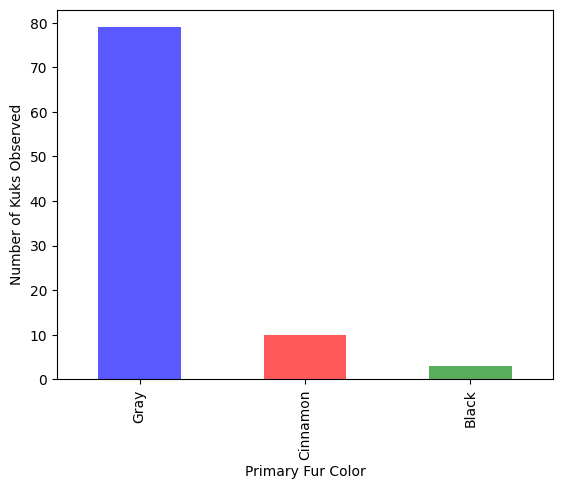

In [97]:
kuks_color = kuks["Primary Fur Color"].value_counts()
kuks_color.plot(kind="bar", color=["blue", "red", "green"], align="center", alpha=.65)
plt.xlabel("Primary Fur Color")
plt.xticks(rotation=90)
plt.ylabel("Number of Kuks Observed")
legend = True
plt.show()


In [98]:

quaas = squirrel_data[squirrel_data["Quaas"] == True]


quaas = quaas.reset_index(drop=True)

quaas.head()

quaas_df = pd.DataFrame(quaas["Primary Fur Color"].value_counts())
quaas_df

,count
Primary Fur Color,
Gray,35
Cinnamon,5
Black,5


In [99]:

quaas_percent = pd.merge(quaas_df, squirrel_pop, on="Primary Fur Color")


quaas_percent = quaas_percent.rename(columns={"count_x": "Quaas", "count_y": "Population"})
quaas_percent["Quaas_Percentage"] = quaas_percent["Quaas"] / quaas_percent["Population"]
quaas_percent["Quaas_Percentage"] = quaas_percent["Quaas_Percentage"].map("{:,.2%}".format)

quaas_percent

,Quaas,Population,Quaas_Percentage
Primary Fur Color,,,
Gray,35,2473,1.42%
Cinnamon,5,392,1.28%
Black,5,103,4.85%


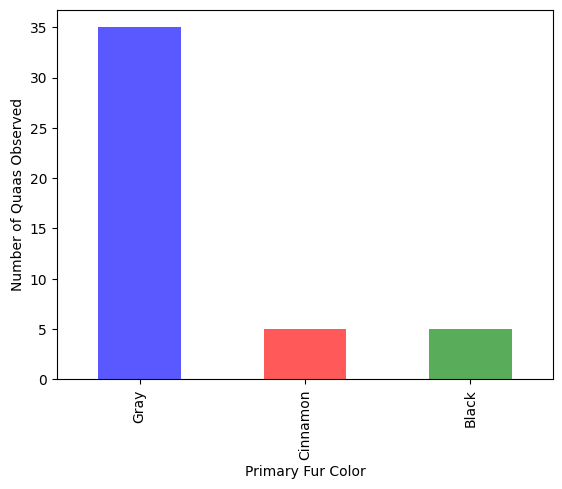

In [100]:
quaas_color = quaas["Primary Fur Color"].value_counts()
quaas_color.plot(kind="bar", color=["blue", "red", "green"], align="center", alpha=.65)
plt.xlabel("Primary Fur Color")
plt.xticks(rotation=90)
plt.ylabel("Number of Quaas Observed")
legend = True
plt.show()

In [101]:

moans = squirrel_data[squirrel_data["Moans"] == True]

# Reset Index
moans = moans.reset_index(drop=True)

moans.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.952229,40.797699,42G-PM-1014-01,42G,PM,10142018,1,Adult,Gray,White,...,False,False,True,False,False,False,False,True,NaN,POINT (-73.9522291603405 40.7976985385835)
1,-73.967741,40.776358,15G-PM-1019-08,15G,PM,10192018,8,Adult,NaN,NaN,...,False,True,True,False,False,False,False,False,NaN,POINT (-73.9677409841969 40.7763579140639)
2,-73.961543,40.790742,31D-AM-1014-01,31D,AM,10142018,1,NaN,Gray,Cinnamon,...,False,False,True,False,False,False,False,True,runs from (dogs!),POINT (-73.9615429203441 40.7907417648701)


In [102]:

moans_percent = pd.merge(moans, squirrel_pop, on="Primary Fur Color")


moans_percent = moans_percent.rename(columns={"count_x": "Moans", "count_y": "Population"})
moans_percent["Moans_Percentage"] = moans_percent["Moans"] / quaas_percent["Population"]
moans_percent["Moans_Percentage"] = moans_percent["Moans_Percentage"].map("{:,.2%}".format)

moans_percent

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long,count,Moans_Percentage
0,-73.952229,40.797699,42G-PM-1014-01,42G,PM,10142018,1,Adult,Gray,White,...,True,False,False,False,False,True,NaN,POINT (-73.9522291603405 40.7976985385835),2473,nan%
1,-73.961543,40.790742,31D-AM-1014-01,31D,AM,10142018,1,NaN,Gray,Cinnamon,...,True,False,False,False,False,True,runs from (dogs!),POINT (-73.9615429203441 40.7907417648701),2473,nan%


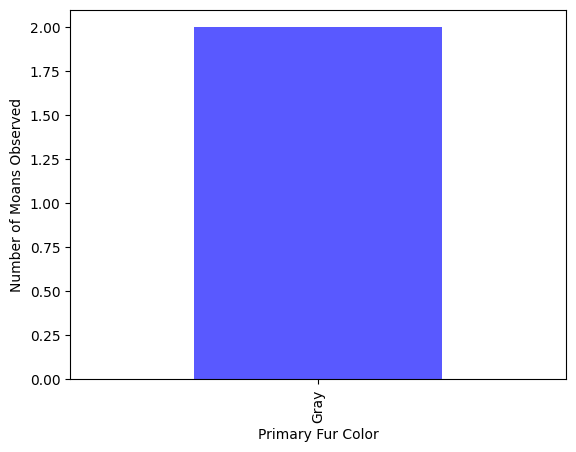

In [103]:
moans_color = moans["Primary Fur Color"].value_counts()
moans_color.plot(kind="bar", color=["blue", "red", "green"], align="center", alpha=.65)
plt.xlabel("Primary Fur Color")
plt.xticks(rotation=90)
plt.ylabel("Number of Moans Observed")
legend = True
plt.show()